In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN
from pyod.utils import data
from pyod.utils.utility import standardizer
from pyod.utils.example import visualize
from pyod import version
version.__version__

'0.7.5'

In [43]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = data.generate_data(
    n_train=n_train, 
    n_test=n_test, 
    contamination=contamination)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 2), (200,), (100, 2), (100,))

In [58]:
df = pd.read_csv('./gqlexamples/examples/northwind/data/csv/orders.csv')

In [78]:
X = df['employeeID'].values
y = df['freight'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((556,), (556,), (274,), (274,))

ValueError: cannot reshape array of size 556 into shape (200,2)

In [19]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [20]:
# evaluate and print the results
print("\nOn Training Data:")
data.evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
data.evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:1.0, precision @ rank n:1.0

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


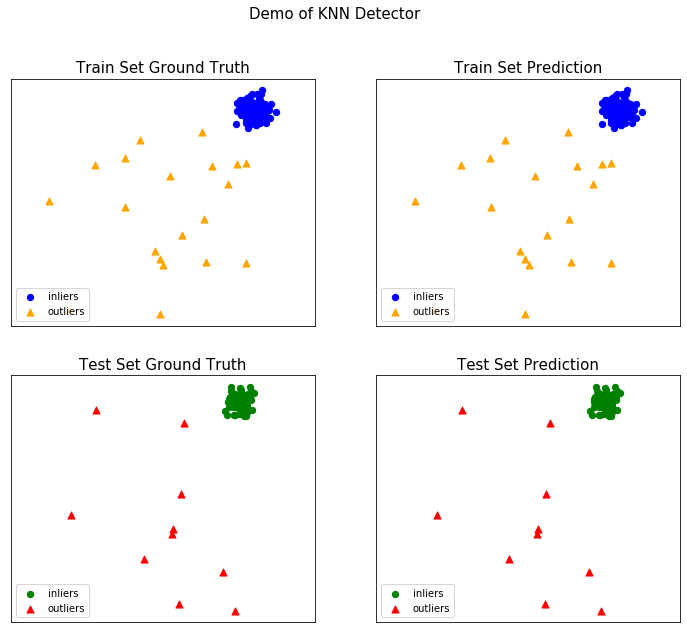

In [21]:
visualize(
    clf_name, 
    X_train, y_train, 
    X_test, y_test, 
    y_train_pred, y_test_pred, 
    show_figure=True, save_figure=False)

In [32]:
X_train_norm, X_test_norm = standardizer(X_train, X_test)
n_clf = 20  # number of base detectors
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
    150, 160, 170, 180, 190, 200]

for i in range(n_clf):
    k = k_list[i]

    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 200, n_neighbors = 201

In [33]:
# https://github.com/yzhao062/pyod/blob/master/examples/comb_example.py